<a href="https://colab.research.google.com/github/Shravni1/Twitter-Sentiment-Analysis/blob/main/Twitter_sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data import

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [41]:
columns = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('twitdata.csv', encoding='ISO-8859-1', header=None, names=columns)

Data Exploration

In [42]:
# First few rows of the dataset
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [43]:
# Last few rows of the dataset
df.tail()

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [45]:
df.shape

(1600000, 6)

In [46]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [47]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

Data Analysis & Visualization

In [48]:
pip install WordCloud

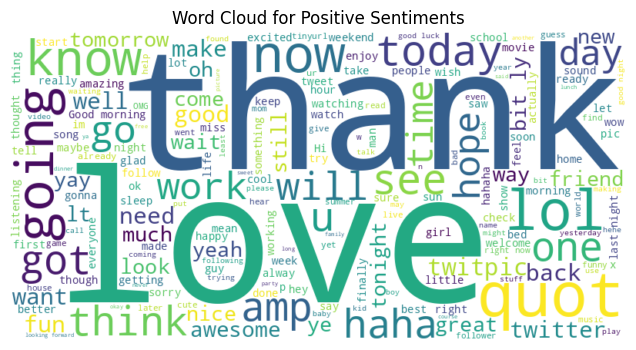

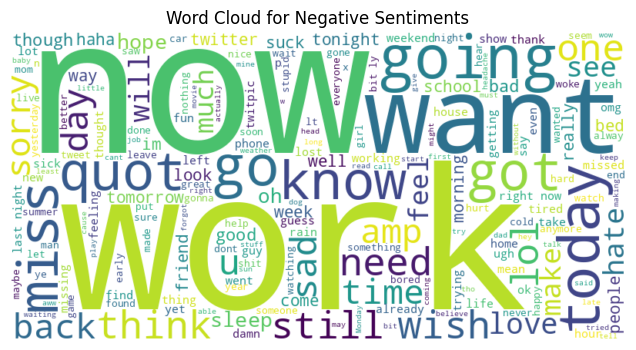

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'text' and 'target' columns in your DataFrame
positive_df = df[df['target'] == 4]
negative_df = df[df['target'] == 0]

# Concatenate all positive and negative texts
positive_text = ' '.join(positive_df['text'].dropna()) if not positive_df.empty else ''
negative_text = ' '.join(negative_df['text'].dropna()) if not negative_df.empty else ''

# Create a figure for Positive Word Cloud
if positive_text:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud for Positive Sentiments')
    plt.axis('off')
    plt.show()
else:
    print("No positive text available for word cloud.")

# Create a figure for Negative Word Cloud
if negative_text:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud for Negative Sentiments')
    plt.axis('off')
    plt.show()
else:
    print("No negative text available for word cloud.")


In [50]:
print("\nSample text from the 'text' column:")
display(df['text'].head())


Sample text from the 'text' column:


0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [51]:
import pandas as pd

# Assuming df is your DataFrame
df['text_length'] = df['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

print("\nStatistics of text lengths:")
print(df['text_length'].describe())




Statistics of text lengths:
count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


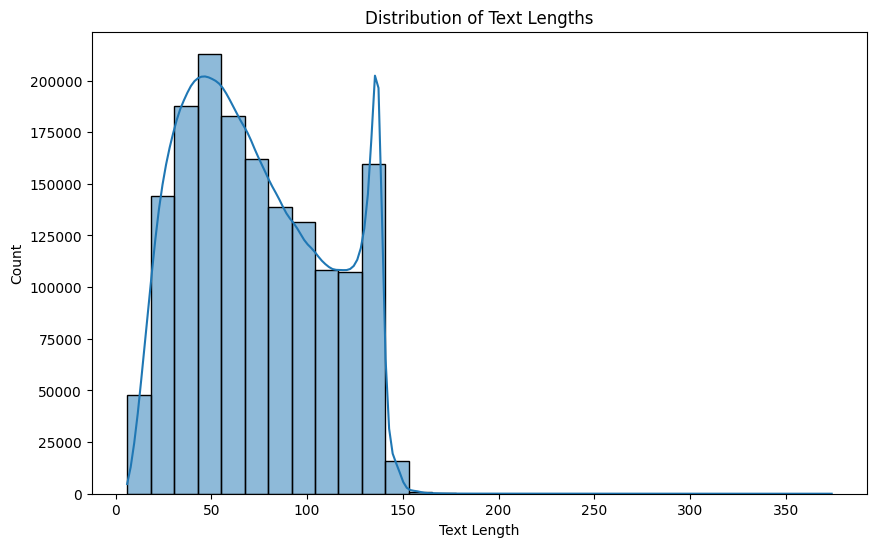

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

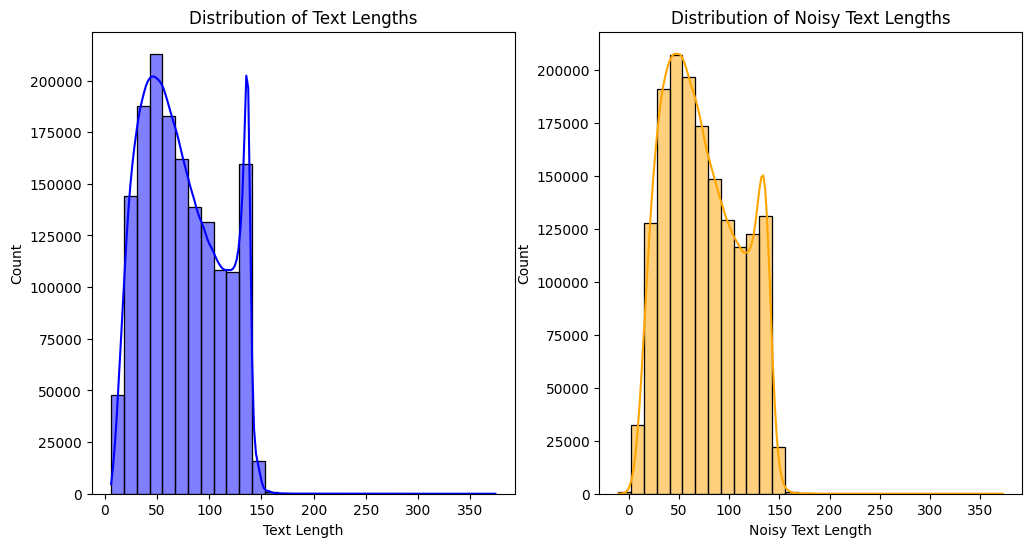

In [53]:
np.random.seed(42)
noise = np.random.normal(0, 5, df.shape[0])
df['noisy_text_length'] = df['text_length'] + noise

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['noisy_text_length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Noisy Text Lengths')
plt.xlabel('Noisy Text Length')
plt.ylabel('Count')

plt.show()


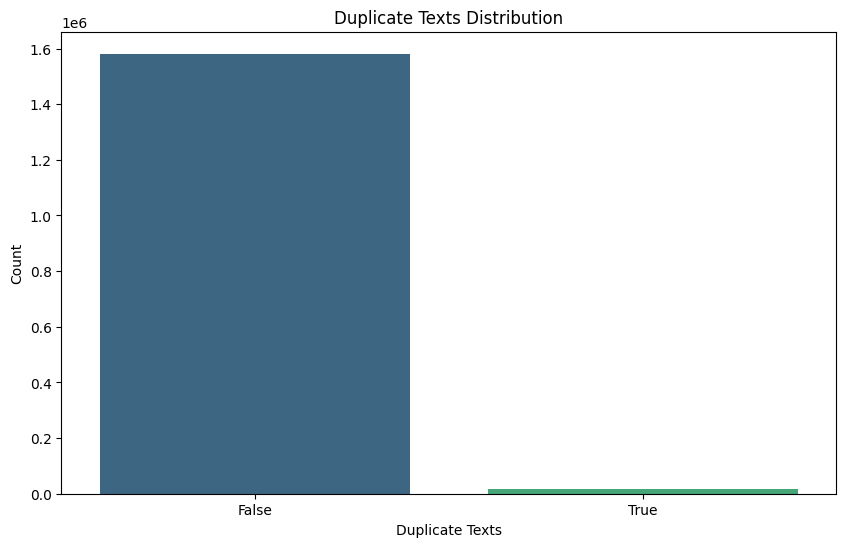

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.duplicated(subset='text'), palette='viridis')
plt.title('Duplicate Texts Distribution')
plt.xlabel('Duplicate Texts')
plt.ylabel('Count')
plt.show()

In [18]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
0    800000
4    800000
Name: target, dtype: int64


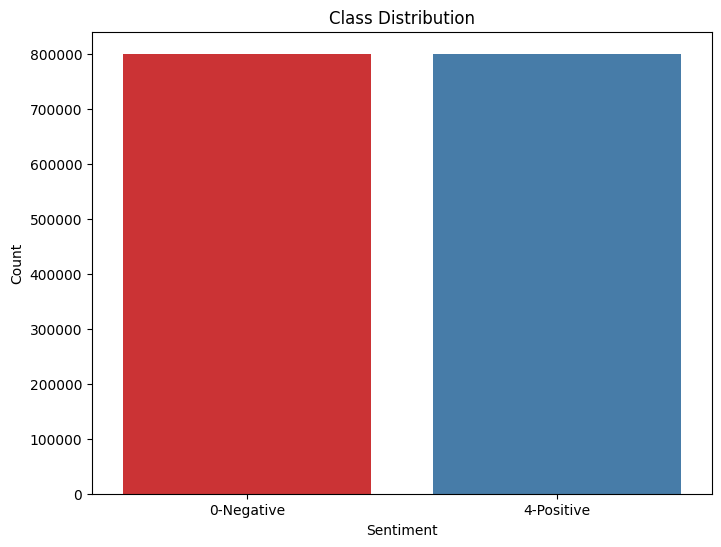

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
plt.show()

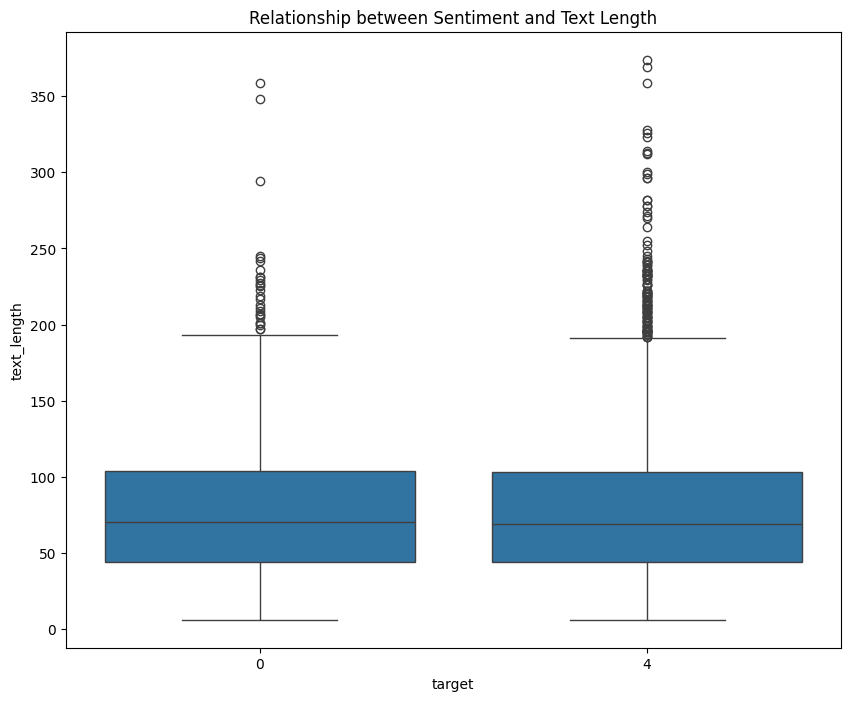

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Relationship between Sentiment and Text Length')
plt.show()

Most frequent words in Positive: {'the': 246501, 'to': 246444, 'I': 196797, 'a': 190388, 'you': 138383, 'and': 135023, 'for': 113503, 'my': 113108, 'is': 99567, 'in': 93873}


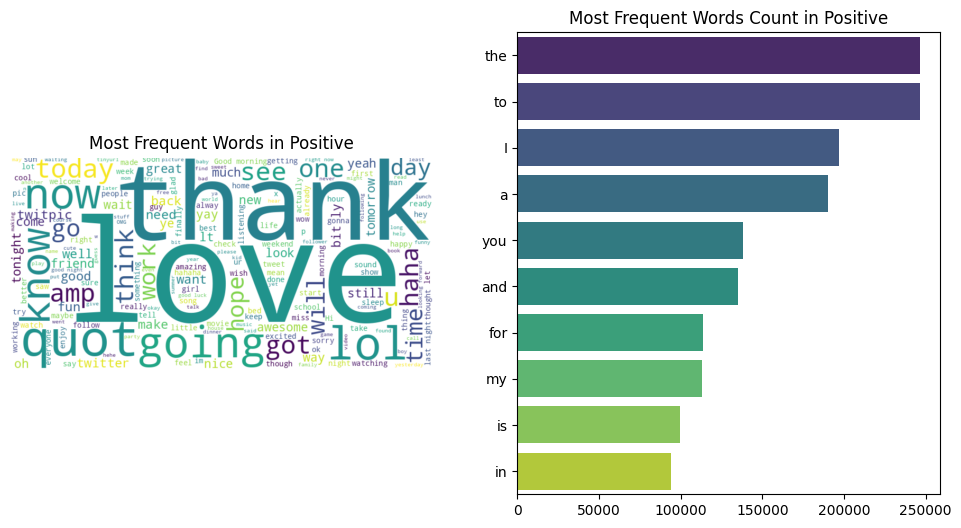

Most frequent words in Negative: {'to': 306518, 'I': 299822, 'the': 241000, 'a': 175824, 'my': 166917, 'i': 160132, 'and': 140240, 'is': 118126, 'in': 108421, 'for': 96298}


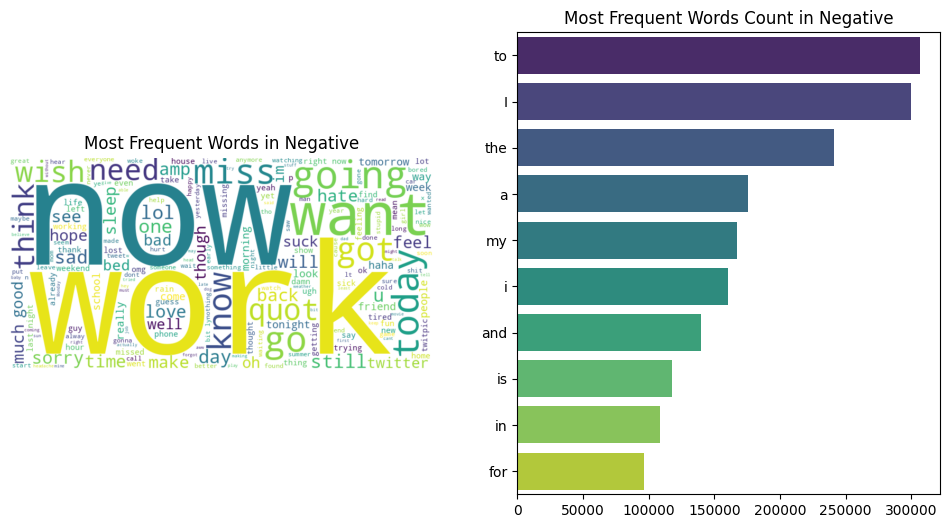

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming you have 'text' and 'target' columns in your DataFrame
positive_df = df[df['target'] == 4]
negative_df = df[df['target'] == 0]

# Concatenate all positive and negative texts
positive_text = ' '.join(positive_df['text'].dropna()) if not positive_df.empty else ''
negative_text = ' '.join(negative_df['text'].dropna()) if not negative_df.empty else ''

# Function to get most frequent words and create word cloud
def plot_most_frequent_words(text, title):
    if text:
        # Tokenize words and count their occurrences
        words = text.split()
        word_counts = Counter(words)

        # Get the most common words and their counts
        most_common_words = dict(word_counts.most_common(10))
        print(f"Most frequent words in {title}: {most_common_words}")

        # Create a word cloud for visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Visualize the most frequent words using a bar chart
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Most Frequent Words in {title}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        sns.barplot(x=list(most_common_words.values()), y=list(most_common_words.keys()), palette='viridis')
        plt.title(f'Most Frequent Words Count in {title}')
        plt.show()
    else:
        print(f"No {title.lower()} text available.")

# Plot most frequent words for positive sentiments
plot_most_frequent_words(positive_text, 'Positive')

# Plot most frequent words for negative sentiments
plot_most_frequent_words(negative_text, 'Negative')


Data Cleaning

In [22]:
duplicate_pairs = df[df.duplicated(subset='text', keep=False)]
duplicate_pairs = duplicate_pairs.sort_values(by='text')

In [23]:
print("Pairs of Duplicate Text:")
display(duplicate_pairs[['text']])

Pairs of Duplicate Text:


,text
271472,David must be hospitalized for five days end...
271505,David must be hospitalized for five days end...
1132076,bathroom is clean..... now on to more enjoya...
1132074,bathroom is clean..... now on to more enjoya...
540159,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
...,...
458170,"zofran is not making this work day any easier,..."
464810,~ get SUICIDE !!
463926,~ get SUICIDE !!
1170868,~~~X0X0~~~!!!X0X0!!! I love you!!! &amp;...


In [24]:
df_deduplicated = df.drop_duplicates()
df_deduplicated_text = df.drop_duplicates(subset='text')

In [25]:
print("Original DataFrame Shape:", df.shape)
print("Deduplicated DataFrame Shape:", df_deduplicated.shape)
df_deduplicated_text['target'].value_counts()


Original DataFrame Shape: (1600000, 8)
Deduplicated DataFrame Shape: (1600000, 8)


4    791281
0    790185
Name: target, dtype: int64

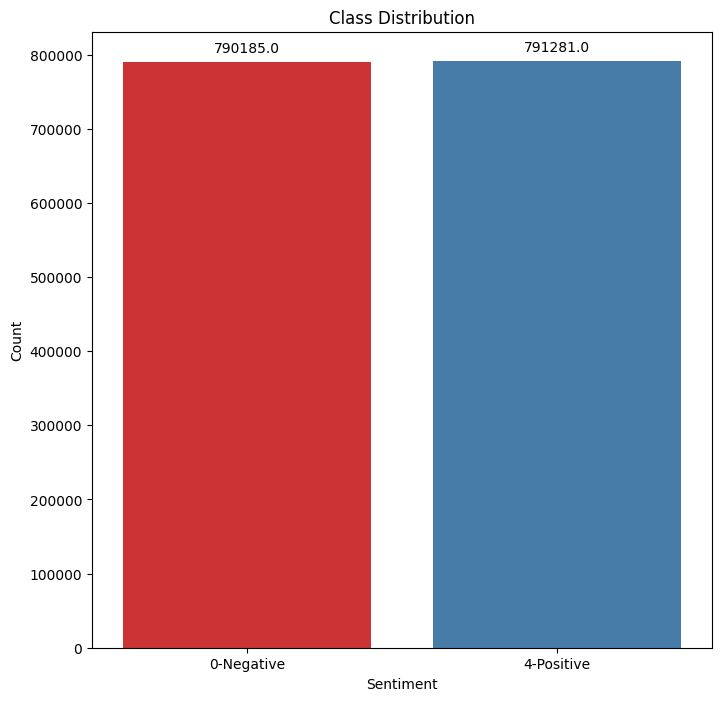

In [26]:

plt.figure(figsize=(8, 8))
ax = sns.countplot(x='target', data=df_deduplicated_text, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
#
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [54]:
df = df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [55]:
df.dropna(inplace=True)

Text Preprocessing

In [56]:
import re

stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn',
    'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
])
# Custom lemmatization dictionary for positive and negative words
custom_lemmatization_rules = {
    'amazing': 'amaze',
    'better': 'good',
    'excellent': 'excel',
    'fantastic': 'fantastic',
    'good': 'good',
    'great': 'great',
    'happy': 'happy',
    'love': 'love',
    'positive': 'positive',
    'wonderful': 'wonderful',
    'splendid': 'splendid',
    'superb': 'superb',
    'marvelous': 'marvelous',
    'outstanding': 'outstanding',
    'terrific': 'terrific',
    'delightful': 'delightful',
    'amazing': 'amazing',
    'magnificent': 'magnificent',
    'joyous': 'joyous',
    'impressive': 'impressive',
    'fabulous': 'fabulous',

    'awful': 'awful',
    'bad': 'bad',
    'disappointing': 'disappoint',
    'horrible': 'horrible',
    'negative': 'negative',
    'poor': 'poor',
    'terrible': 'terrible',
    'unhappy': 'unhappy',
    'terrible': 'terrible',
    'miserable': 'miserable',
    'sad': 'sad',
    'gloomy': 'gloomy',
    'unsatisfactory': 'unsatisfactory',
    'dreadful': 'dreadful',
    'unpleasant': 'unpleasant',
    'distressing': 'distress',
    'disheartening': 'dishearten',
    'frustrating': 'frustrate',
    'annoying': 'annoy',
    'irritating': 'irritate',
    'regrettable': 'regret',
    'negative': 'negative',
    'unpleasant': 'unpleasant',
    'dismal': 'dismal',
    'depressing': 'depress',
    'displeasing': 'displease',
    'disgusting': 'disgust',

}

# Lemmatization function
def custom_lemmatize(word):
    return custom_lemmatization_rules.get(word, word)


def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove common punctuation as delimiters
    text = re.sub(r'[^\w\s]', '', text)

    # Numerical character removal
    text = re.sub('[0-9]+', '', text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Removing user@ references and #
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Tokenization (simple split)
    filtered_list = text.split()

        # Stopword removal
    filtered_list = [word for word in filtered_list if word not in stop_words]

    # Lemmatization
    filtered_list = [custom_lemmatize(word) for word in filtered_list]

    cleaned_text = " ".join(filtered_list)


    return cleaned_text

dirty_text = "Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com"
cleaned_text = clean_text(dirty_text)

print("Original Text:", dirty_text)
print("Cleaned and Lemmatized Text:", cleaned_text)


Original Text: Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com
Cleaned and Lemmatized Text: hello excel good good example text special characters url


In [57]:
import pandas as pd

# Assuming you have a function named 'clean_text' defined

# Function to clean text
def clean_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Apply your text cleaning operations here
        return text.lower()  # Example: Convert to lowercase
    else:
        # Handle non-string values (e.g., NaN, numbers, etc.)
        return str(text)

# Apply the 'clean_text' function to the 'text' column and create a new 'cleaned_text' column
df_deduplicated_text['cleaned_text'] = df_deduplicated_text['text'].apply(clean_text)

# Display the 'cleaned_text' column
display(df_deduplicated_text[['cleaned_text']])



,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,is upset that he can't update his facebook by ...
2,@kenichan i dived many times for the ball. man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
...,...
1599995,just woke up. having no school is the best fee...
1599996,thewdb.com - very cool to hear old walt interv...
1599997,are you ready for your mojo makeover? ask me f...
1599998,happy 38th birthday to my boo of alll time!!! ...


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_deduplicated_text['target_encoded'] = label_encoder.fit_transform(df_deduplicated_text['target'])
df_deduplicated_text['target_encoded']

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target_encoded, Length: 1581466, dtype: int64

In [59]:
df_deduplicated_text['target_encoded'].value_counts()

1    791281
0    790185
Name: target_encoded, dtype: int64

In [60]:
max_sample_size = 1000000
subset_df = df_deduplicated_text.groupby('target').apply(lambda x: x.sample(n=min(max_sample_size // 2, len(x)), replace=True)).reset_index(drop=True)
subset_df['target'].value_counts()



0    500000
4    500000
Name: target, dtype: int64

In [62]:
pip install TextBlob


Model Evaluation

In [64]:
model = make_pipeline(TfidfVectorizer())

param_grid = {
    'tfidfvectorizer__max_features': [85,90,95,100,110,120],

}

In [65]:
X_train, X_test, y_train, y_test = train_test_split(subset_df['cleaned_text'], subset_df['target_encoded'], test_size=0.3, random_state=42)

In [67]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer())]),
             param_grid={'tfidfvectorizer__max_features': [85, 90, 95, 100, 110,
                                                           120]},
             scoring='accuracy')

In [ ]:
best_params_ = grid_search.best_params_
print("Best Hyperparameters :", best_params_)

In [69]:
best_max_features = best_params_['tfidfvectorizer__max_features']

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5, 10, 15, 20, 25, 30, 35, 40, 44, 45, 50, 55, 60, 65, 75, 100, 110, 115, 120]}
nb_classifier_tuned = GridSearchCV(MultinomialNB(), param_grid, cv=5)
nb_classifier_tuned.fit(X_train_tfidf, y_train)

# Best hyperparameter
best_alpha = nb_classifier_tuned.best_params_['alpha']

print(f"Best hyperparameter (alpha): {best_alpha}")




Best hyperparameter (alpha): 0.5


In [71]:
nb_classifier = MultinomialNB(alpha=best_alpha)
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.5)

In [72]:
nb_cross_val_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)
print('Naive Bayes Cross-Validation Scores:', nb_cross_val_scores)

Naive Bayes Cross-Validation Scores: [0.79045714 0.79074286 0.79036429 0.79142857 0.79204286]


In [73]:
print("Mean Accuracy:", nb_cross_val_scores.mean())

Mean Accuracy: 0.7910071428571428


In [74]:
nb_predictions_train = nb_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train,nb_predictions_train)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.86934


In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# Assuming you have already transformed your text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, nb_predictions)
print("Test Accuracy:", test_accuracy)



Test Accuracy: 0.79616


In [76]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_confusion_matrix

array([[126753,  23060],
       [ 38092, 112095]])

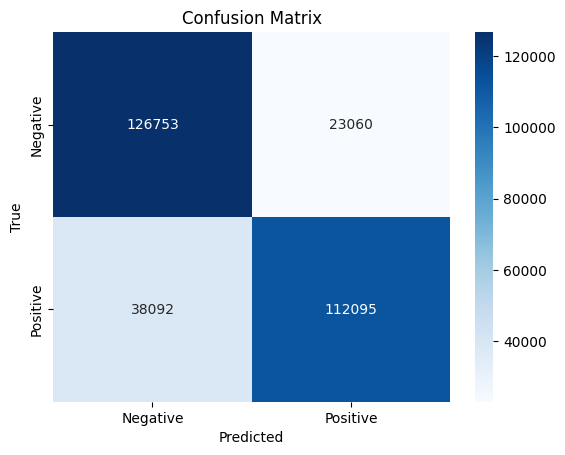

In [77]:
conf_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [78]:
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print('Naive Bayes Classification Report:')
print(nb_classification_report)
print('Naive Bayes Confusion Matrix:')
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.80
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81    149813
           1       0.83      0.75      0.79    150187

    accuracy                           0.80    300000
   macro avg       0.80      0.80      0.80    300000
weighted avg       0.80      0.80      0.80    300000

Naive Bayes Confusion Matrix:
[[126753  23060]
 [ 38092 112095]]


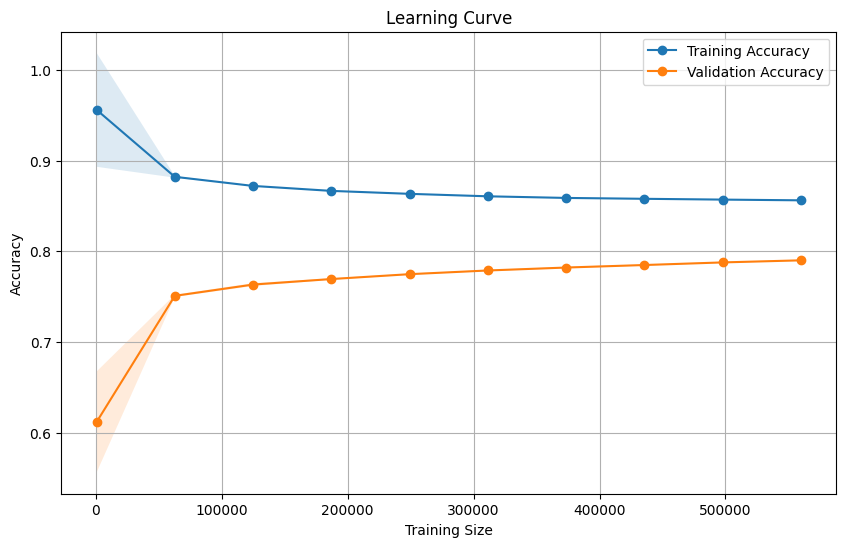

In [79]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    nb_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.001, 1.0, 10)
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Conclusion:  I created a machine learning model which utilized both test and train datasets, enhancing accuracy through data visualization and cleaning processes. The model's objective was to classify tweets, and by implementing these techniques, I achieved success in accurately categorizing them.





